In [39]:
# import libraries
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# check torch version
torch.__version__

'2.2.1+cu121'

In [41]:
# Setup agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Using device: {device}")

Using device: cuda


In [42]:
# data
weight = 0.7
bias = 0.3

# create range of values
start = 0
end = 1
step = 0.02

# create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)

y = weight * X + bias

In [43]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [44]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [45]:
# create function for plot
def plot_preds(train_data=X_train,
               train_labels=y_train,
               test_data=X_test,
               test_labels=y_test,
               predictions=None):
  # plot train data
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data") # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
  # plot test data
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")

  # check if 'predictions' exist
  if predictions is not None:
    # plot the predictions
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # show the legend
  plt.legend(prop={"size": 14})

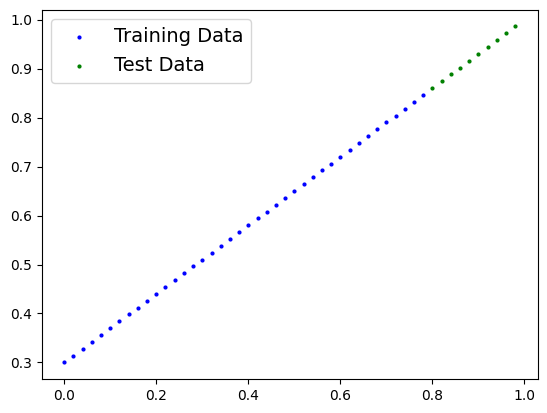

In [46]:
plot_preds()

In [47]:
# Create our model
class LinearRegressionModelExercise(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                   out_features=1)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [48]:
# set the manual seed
torch.manual_seed(42)

# create instance of our model
model = LinearRegressionModelExercise()

model, model.state_dict()

(LinearRegressionModelExercise(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [49]:
# check the model current device
next(model.parameters()).device

device(type='cpu')

In [50]:
# Set the model to use target device
model.to(device)
next(model.parameters()).device

device(type='cuda', index=0)

In [51]:
# for training our model we need 4 things on our hand: 1. loss function 2. optimizer 3. training loop and 4. testing loop
# 1. loss function
loss_fnc = nn.L1Loss()

# 2. optimizer
optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.01)


In [52]:
# 3. training loop
torch.manual_seed(42)

epochs=200

# put the data to the target device (device agnosting code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model.train()

  # 1. Forward pass
  y_pred = model(X_train)

  # 2. Calculate the loss
  loss = loss_fnc(y_pred, y_train)

  # 3. Optimizer zeor grad
  optimizer.zero_grad()

  # 4. backpropagation
  loss.backward()

  # 5. optimizer step
  optimizer.step()


  ### Testing
  model.eval()

  with torch.inference_mode():
    test_pred = model(X_test)

    # Calculate the loss
    test_loss = loss_fnc(test_pred, y_test)

  # print out the result
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss | {test_loss}")


Epoch: 0 | Loss: 0.5551779866218567 | Test Loss | 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test Loss | 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss | 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test Loss | 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test Loss | 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test Loss | 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test Loss | 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss | 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test Loss | 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss | 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test Loss | 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test Loss | 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss | 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss | 0.0

In [53]:
weight, bias

(0.7, 0.3)

In [54]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [55]:
# make predictions
model.eval()
with torch.inference_mode():
  y_preds = model(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

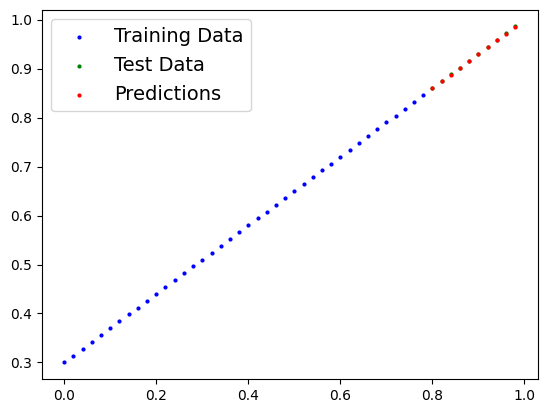

In [56]:
plot_preds(predictions=y_preds.cpu())